# Task 1

---

## Purpose of this Task

In this notebook, team leader advised on focusing on the reviews from the customers about the airline itself. The goal of this task is to extract the customer reviews from the Skytrax website to extract as much data as possible to determine the customer experience and improve the extraction points so that British Airlines can provide the customers a better service and imporve on the areas they  are lacking

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
## Importing Libraries needede to execute the task

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Using Beautiful soap library to extract data from SkyTrax

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 37 # Total pages consisting of reviews
page_size = 100 # Total number of reviews per page

reviews = []
stars = []
date = []
country = []

# Scrapping each page for thr reviews, stars, date and country of the customer
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html5')
    for para in parsed_content.find_all("div", class_ = "text_content"):
        reviews.append(para.text)
        
    for para in parsed_content.find_all("div", class_ ="rating-10"):
        try:
            stars.append(para.span.text)
        except:
            print(f'Error on page {i}')
            stars.append('None')
        
    for para in parsed_content.find_all("time"):
        date.append(para.text)

    for para in parsed_content.find_all("h3"):
        country.append(para.span.next_sibling.text.strip(" ()"))
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [7]:
# Making sure the data collected for each of the column is same 
len(reviews)

3612

In [8]:
# Making sure the data collected for each of the column is same
len(country)

3612

In [9]:
# Making sure the data collected for each of the column is same
len(stars)

3649

In [10]:
# Since we have imbalance of stars data in the stars column so we are going to extract the stars data for the column size of other data columns
stars = stars[:3612]

In [11]:
len(stars)

3612

In [27]:
# Creating a Dataframe to store the columns containing data
df = pd.DataFrame()
df["reviews"] = reviews
df["stars"] = stars
df["date"] = date
df["country"] = country
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | Terrible Experience with Bri...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,29th July 2023,Canada
1,✅ Trip Verified | An airline that lives in the...,1,26th July 2023,Qatar
2,✅ Trip Verified | Check-in Desk rude and dism...,1,26th July 2023,United Kingdom
3,✅ Trip Verified | I chose British Airways espe...,2,25th July 2023,Spain
4,Not Verified | I booked Premium Economy from I...,1,24th July 2023,United Kingdom


In [28]:
# Checking the dataTypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3612 non-null   object
 1   stars    3612 non-null   object
 2   date     3612 non-null   object
 3   country  3612 non-null   object
dtypes: object(4)
memory usage: 113.0+ KB


In [29]:
# Storing the dataframe into csv file on local machine
df.to_csv("BA_val_reviews.csv")

In [4]:
# Reading the data from the CSV for data cleaning 
df = pd.read_csv("BA_val_reviews.csv")

In [5]:
df.head()

,Unnamed: 0,reviews,stars,date,country
0,0,✅ Trip Verified | Terrible Experience with Bri...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,29th July 2023,Canada
1,1,✅ Trip Verified | An airline that lives in the...,1,26th July 2023,Qatar
2,2,✅ Trip Verified | Check-in Desk rude and dism...,1,26th July 2023,United Kingdom
3,3,✅ Trip Verified | I chose British Airways espe...,2,25th July 2023,Spain
4,4,Not Verified | I booked Premium Economy from I...,1,24th July 2023,United Kingdom


In [6]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3612 non-null   int64 
 1   reviews     3612 non-null   object
 2   stars       3612 non-null   object
 3   date        3612 non-null   object
 4   country     3610 non-null   object
dtypes: int64(1), object(4)
memory usage: 141.2+ KB


In [7]:
# Checking for null values in the dataset
df.isnull().sum()

Unnamed: 0    0
reviews       0
stars         0
date          0
country       2
dtype: int64

In [8]:
# Since country column has 2 null values we can see the row ID's
df[df['country'].isna()]

,Unnamed: 0,reviews,stars,date,country
2968,2968,I travelled from London to Jo'burg and back on...,7,8th April 2015,NaN
3268,3268,St Lucia to London round trip. Full flight bot...,7,20th October 2014,NaN


In [9]:
# statistical information about the dataset
df.describe()

,Unnamed: 0
count,3612.000000
mean,1805.500000
std,1042.838914
min,0.000000
25%,902.750000
50%,1805.500000
75%,2708.250000
max,3611.000000


In [10]:
# Dropping Useless column
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [11]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | Terrible Experience with Bri...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,29th July 2023,Canada
1,✅ Trip Verified | An airline that lives in the...,1,26th July 2023,Qatar
2,✅ Trip Verified | Check-in Desk rude and dism...,1,26th July 2023,United Kingdom
3,✅ Trip Verified | I chose British Airways espe...,2,25th July 2023,Spain
4,Not Verified | I booked Premium Economy from I...,1,24th July 2023,United Kingdom


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3612 non-null   object
 1   stars    3612 non-null   object
 2   date     3612 non-null   object
 3   country  3610 non-null   object
dtypes: object(4)
memory usage: 113.0+ KB


In [13]:
# Extracting Trip verification/not verification from the Reviews Column
df['TripVerification'] = df['reviews'].str.split('|').str[0]

In [14]:
df.head()

,reviews,stars,date,country,TripVerification
0,✅ Trip Verified | Terrible Experience with Bri...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,29th July 2023,Canada,✅ Trip Verified
1,✅ Trip Verified | An airline that lives in the...,1,26th July 2023,Qatar,✅ Trip Verified
2,✅ Trip Verified | Check-in Desk rude and dism...,1,26th July 2023,United Kingdom,✅ Trip Verified
3,✅ Trip Verified | I chose British Airways espe...,2,25th July 2023,Spain,✅ Trip Verified
4,Not Verified | I booked Premium Economy from I...,1,24th July 2023,United Kingdom,Not Verified


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   reviews           3612 non-null   object
 1   stars             3612 non-null   object
 2   date              3612 non-null   object
 3   country           3610 non-null   object
 4   TripVerification  3612 non-null   object
dtypes: object(5)
memory usage: 141.2+ KB


In [16]:
# Extracting customer Trip Reviews from the reviews column
df['TripReviews'] = df['reviews'].str.split('|').str[1]

In [17]:
df.head()

,reviews,stars,date,country,TripVerification,TripReviews
0,✅ Trip Verified | Terrible Experience with Bri...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,29th July 2023,Canada,✅ Trip Verified,Terrible Experience with British Airways. I b...
1,✅ Trip Verified | An airline that lives in the...,1,26th July 2023,Qatar,✅ Trip Verified,An airline that lives in their past glory and...
2,✅ Trip Verified | Check-in Desk rude and dism...,1,26th July 2023,United Kingdom,✅ Trip Verified,Check-in Desk rude and dismissive. Flight la...
3,✅ Trip Verified | I chose British Airways espe...,2,25th July 2023,Spain,✅ Trip Verified,I chose British Airways especially because I ...
4,Not Verified | I booked Premium Economy from I...,1,24th July 2023,United Kingdom,Not Verified,I booked Premium Economy from INV to LAX (via...


In [18]:
# Extracted Trip Reviews from the reviews column shows large null data in the Trip Reviews column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   reviews           3612 non-null   object
 1   stars             3612 non-null   object
 2   date              3612 non-null   object
 3   country           3610 non-null   object
 4   TripVerification  3612 non-null   object
 5   TripReviews       2089 non-null   object
dtypes: object(6)
memory usage: 169.4+ KB


In [19]:
# Amount of Null values from the Trip Reviews
df.isnull().sum()

reviews                0
stars                  0
date                   0
country                2
TripVerification       0
TripReviews         1523
dtype: int64

In [20]:
# On searching for the Trip reviews nan values found out that Trip verification have the Trip reviews data as those 
# 1523 Rows did not have the Trip verfied/not verified status
df[df['TripReviews'].isna()]

,reviews,stars,date,country,TripVerification,TripReviews
1183,Two regular an uneventful flights. Curiously e...,2,13th March 2018,Portugal,Two regular an uneventful flights. Curiously e...,NaN
1824,Flew London Gatwick to Tampa with British Airw...,8,27th December 2016,United Kingdom,Flew London Gatwick to Tampa with British Airw...,NaN
1828,Frankfurt to Cape Town via London Heathrow. Th...,10,23rd December 2016,Luxembourg,Frankfurt to Cape Town via London Heathrow. Th...,NaN
1837,Bangkok to Manchester via London. I used to fl...,1,17th December 2016,Thailand,Bangkok to Manchester via London. I used to fl...,NaN
1838,The return flight from St Lucia started well. ...,4,16th December 2016,United Kingdom,The return flight from St Lucia started well. ...,NaN
...,...,...,...,...,...,...
3607,YYZ to LHR - July 2012 - I flew overnight in p...,9,29th August 2012,Canada,YYZ to LHR - July 2012 - I flew overnight in p...,NaN
3608,LHR to HAM. Purser addresses all club passenge...,7,28th August 2012,United Kingdom,LHR to HAM. Purser addresses all club passenge...,NaN
3609,My son who had worked for British Airways urge...,1,12th October 2011,United Kingdom,My son who had worked for British Airways urge...,NaN
3610,London City-New York JFK via Shannon on A318 b...,9,11th October 2011,United States,London City-New York JFK via Shannon on A318 b...,NaN


In [21]:
# Filled the nan values of the Trip Reviews from Trip Verified column and Treated those 1523 rows as not verified 
df.TripReviews.fillna(df.TripVerification, inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   reviews           3612 non-null   object
 1   stars             3612 non-null   object
 2   date              3612 non-null   object
 3   country           3610 non-null   object
 4   TripVerification  3612 non-null   object
 5   TripReviews       3612 non-null   object
dtypes: object(6)
memory usage: 169.4+ KB


In [23]:
df.head()

,reviews,stars,date,country,TripVerification,TripReviews
0,✅ Trip Verified | Terrible Experience with Bri...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,29th July 2023,Canada,✅ Trip Verified,Terrible Experience with British Airways. I b...
1,✅ Trip Verified | An airline that lives in the...,1,26th July 2023,Qatar,✅ Trip Verified,An airline that lives in their past glory and...
2,✅ Trip Verified | Check-in Desk rude and dism...,1,26th July 2023,United Kingdom,✅ Trip Verified,Check-in Desk rude and dismissive. Flight la...
3,✅ Trip Verified | I chose British Airways espe...,2,25th July 2023,Spain,✅ Trip Verified,I chose British Airways especially because I ...
4,Not Verified | I booked Premium Economy from I...,1,24th July 2023,United Kingdom,Not Verified,I booked Premium Economy from INV to LAX (via...


In [24]:
# Dropped the reviews column as we have extracted Trip verification and Trip Reviews from the reviews column
df.drop('reviews', axis = 1, inplace=True)

In [25]:
df.head()

,stars,date,country,TripVerification,TripReviews
0,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,29th July 2023,Canada,✅ Trip Verified,Terrible Experience with British Airways. I b...
1,1,26th July 2023,Qatar,✅ Trip Verified,An airline that lives in their past glory and...
2,1,26th July 2023,United Kingdom,✅ Trip Verified,Check-in Desk rude and dismissive. Flight la...
3,2,25th July 2023,Spain,✅ Trip Verified,I chose British Airways especially because I ...
4,1,24th July 2023,United Kingdom,Not Verified,I booked Premium Economy from INV to LAX (via...


In [26]:
# Converting the Trip Verification column into Boolean values
df['TripVerification'] = df.TripVerification.str.contains('✅ Trip Verified')

In [27]:
df.head()

,stars,date,country,TripVerification,TripReviews
0,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,29th July 2023,Canada,True,Terrible Experience with British Airways. I b...
1,1,26th July 2023,Qatar,True,An airline that lives in their past glory and...
2,1,26th July 2023,United Kingdom,True,Check-in Desk rude and dismissive. Flight la...
3,2,25th July 2023,Spain,True,I chose British Airways especially because I ...
4,1,24th July 2023,United Kingdom,False,I booked Premium Economy from INV to LAX (via...


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stars             3612 non-null   object
 1   date              3612 non-null   object
 2   country           3610 non-null   object
 3   TripVerification  3612 non-null   bool  
 4   TripReviews       3612 non-null   object
dtypes: bool(1), object(4)
memory usage: 116.5+ KB


In [29]:
# Filling the 2 countries nan values
df[df['country'].isna()]

,stars,date,country,TripVerification,TripReviews
2968,7,8th April 2015,NaN,False,I travelled from London to Jo'burg and back on...
3268,7,20th October 2014,NaN,False,St Lucia to London round trip. Full flight bot...


In [30]:
# From the data we can see the 2 nan rows countries are United Kingdom and St Lucia
df.at[2968, 'country'] = 'United Kingdom'
df.at[3268, 'country'] = 'St Lucia'

In [31]:
# Viewing if the change has been implemented
country_value = df.loc[3268, 'country']

print(country_value)

St Lucia


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stars             3612 non-null   object
 1   date              3612 non-null   object
 2   country           3612 non-null   object
 3   TripVerification  3612 non-null   bool  
 4   TripReviews       3612 non-null   object
dtypes: bool(1), object(4)
memory usage: 116.5+ KB


In [33]:
# Cleaning the Stars column with the garbage values attached to the rating caused by extraction of stars column from SkyTrax 
df.stars = df.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [34]:
df.head()

,stars,date,country,TripVerification,TripReviews
0,5,29th July 2023,Canada,True,Terrible Experience with British Airways. I b...
1,1,26th July 2023,Qatar,True,An airline that lives in their past glory and...
2,1,26th July 2023,United Kingdom,True,Check-in Desk rude and dismissive. Flight la...
3,2,25th July 2023,Spain,True,I chose British Airways especially because I ...
4,1,24th July 2023,United Kingdom,False,I booked Premium Economy from INV to LAX (via...


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stars             3612 non-null   object
 1   date              3612 non-null   object
 2   country           3612 non-null   object
 3   TripVerification  3612 non-null   bool  
 4   TripReviews       3612 non-null   object
dtypes: bool(1), object(4)
memory usage: 116.5+ KB


In [36]:
# Found out that there are none values in the Star column
stars_value = df.loc[3073]

print(stars_value)

stars                                                            None
date                                                21st January 2015
country                                                       Ireland
TripVerification                                                False
TripReviews         DUB-LCY (BA 4467) got the flight on sale for a...
Name: 3073, dtype: object


In [37]:
# Visualize how many None values we have in the star column - 5 None Values
none_rows = df[df['stars'].astype(str) == 'None']

print(none_rows)

     stars                date         country  TripVerification  \
3073  None   21st January 2015         Ireland             False   
3196  None  20th November 2014         Belgium             False   
3216  None  12th November 2014        Portugal             False   
3456  None      12th July 2014         Ireland             False   
3483  None      25th June 2014  United Kingdom             False   

                                            TripReviews  
3073  DUB-LCY (BA 4467) got the flight on sale for a...  
3196  AMS-LHR-JNBJNB-LHR-AMS all flights on time ver...  
3216  LPT to LHR and back found the planes new and i...  
3456  Paris - London - Nassau. All flights on time. ...  
3483  Have flown with BA several times over past few...  


In [38]:
# We have 5 None Values in the Star column
none_count = df['stars'].astype(str).value_counts()['None']

print(none_count)

5


In [39]:
# Droppinng 5 none values as we cant fill them and 5 values are very few so they wont cause a change in the results
df.drop(df[df.stars == "None"].index, axis=0, inplace=True)

In [40]:
df['stars'] = pd.to_numeric(df['stars'])

In [41]:
df['stars'].value_counts().sort_index()

1     815
2     414
3     399
4     243
5     266
6     187
7     308
8     354
9     306
10    315
Name: stars, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3607 entries, 0 to 3611
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stars             3607 non-null   int64 
 1   date              3607 non-null   object
 2   country           3607 non-null   object
 3   TripVerification  3607 non-null   bool  
 4   TripReviews       3607 non-null   object
dtypes: bool(1), int64(1), object(3)
memory usage: 144.4+ KB


In [43]:
df.head()

,stars,date,country,TripVerification,TripReviews
0,5,29th July 2023,Canada,True,Terrible Experience with British Airways. I b...
1,1,26th July 2023,Qatar,True,An airline that lives in their past glory and...
2,1,26th July 2023,United Kingdom,True,Check-in Desk rude and dismissive. Flight la...
3,2,25th July 2023,Spain,True,I chose British Airways especially because I ...
4,1,24th July 2023,United Kingdom,False,I booked Premium Economy from INV to LAX (via...


In [44]:
# Converting Trip verification from Bool Values into numeric bool values 
df['TripVerification'] = df['TripVerification'].astype(int)

In [45]:
df.head()

,stars,date,country,TripVerification,TripReviews
0,5,29th July 2023,Canada,1,Terrible Experience with British Airways. I b...
1,1,26th July 2023,Qatar,1,An airline that lives in their past glory and...
2,1,26th July 2023,United Kingdom,1,Check-in Desk rude and dismissive. Flight la...
3,2,25th July 2023,Spain,1,I chose British Airways especially because I ...
4,1,24th July 2023,United Kingdom,0,I booked Premium Economy from INV to LAX (via...


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3607 entries, 0 to 3611
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stars             3607 non-null   int64 
 1   date              3607 non-null   object
 2   country           3607 non-null   object
 3   TripVerification  3607 non-null   int64 
 4   TripReviews       3607 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.1+ KB


In [47]:
# Converting Date column from Object to Date Time data type
df['date'] = pd.to_datetime(df['date'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3607 entries, 0 to 3611
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   stars             3607 non-null   int64         
 1   date              3607 non-null   datetime64[ns]
 2   country           3607 non-null   object        
 3   TripVerification  3607 non-null   int64         
 4   TripReviews       3607 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 169.1+ KB


In [49]:
# Extracting year month and date from the date time column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [50]:
df.head()

,stars,date,country,TripVerification,TripReviews,year,month,day
0,5,2023-07-29,Canada,1,Terrible Experience with British Airways. I b...,2023,7,29
1,1,2023-07-26,Qatar,1,An airline that lives in their past glory and...,2023,7,26
2,1,2023-07-26,United Kingdom,1,Check-in Desk rude and dismissive. Flight la...,2023,7,26
3,2,2023-07-25,Spain,1,I chose British Airways especially because I ...,2023,7,25
4,1,2023-07-24,United Kingdom,0,I booked Premium Economy from INV to LAX (via...,2023,7,24


In [51]:
df.head()

,stars,date,country,TripVerification,TripReviews,year,month,day
0,5,2023-07-29,Canada,1,Terrible Experience with British Airways. I b...,2023,7,29
1,1,2023-07-26,Qatar,1,An airline that lives in their past glory and...,2023,7,26
2,1,2023-07-26,United Kingdom,1,Check-in Desk rude and dismissive. Flight la...,2023,7,26
3,2,2023-07-25,Spain,1,I chose British Airways especially because I ...,2023,7,25
4,1,2023-07-24,United Kingdom,0,I booked Premium Economy from INV to LAX (via...,2023,7,24


In [52]:
#Dropping the date column as we have extracted the day, month, year from the data column
df.drop('date', axis = 1, inplace=True)

In [53]:
df.head()

,stars,country,TripVerification,TripReviews,year,month,day
0,5,Canada,1,Terrible Experience with British Airways. I b...,2023,7,29
1,1,Qatar,1,An airline that lives in their past glory and...,2023,7,26
2,1,United Kingdom,1,Check-in Desk rude and dismissive. Flight la...,2023,7,26
3,2,Spain,1,I chose British Airways especially because I ...,2023,7,25
4,1,United Kingdom,0,I booked Premium Economy from INV to LAX (via...,2023,7,24


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3607 entries, 0 to 3611
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   stars             3607 non-null   int64 
 1   country           3607 non-null   object
 2   TripVerification  3607 non-null   int64 
 3   TripReviews       3607 non-null   object
 4   year              3607 non-null   int64 
 5   month             3607 non-null   int64 
 6   day               3607 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 225.4+ KB


# Exploratory data Analysis of the Cleaned dataset of British Airways

In [55]:
# Importing analysis libraries

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [56]:
# Downloading missing libraries

import nltk

# Download the 'punkt' resource
nltk.download('punkt')

# Download the 'stopwords' corpus
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /Users/safi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/safi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
# Text preprocessing function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Removing punctuation and special characters
    tokens = [token for token in tokens if token not in string.punctuation]

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    return ' '.join(tokens)

In [58]:
df['cleaned_reviews'] = df['TripReviews'].apply(preprocess_text)

In [59]:
df.head()

,stars,country,TripVerification,TripReviews,year,month,day,cleaned_reviews
0,5,Canada,1,Terrible Experience with British Airways. I b...,2023,7,29,terribl experi british airway book flight ba t...
1,1,Qatar,1,An airline that lives in their past glory and...,2023,7,26,airlin live past glori head futur crisi britis...
2,1,United Kingdom,1,Check-in Desk rude and dismissive. Flight la...,2023,7,26,check-in desk rude dismiss flight late seem ne...
3,2,Spain,1,I chose British Airways especially because I ...,2023,7,25,chose british airway especi go travel niec nep...
4,1,United Kingdom,0,I booked Premium Economy from INV to LAX (via...,2023,7,24,book premium economi inv lax via lhr notifi ca...


In [60]:
#Average overall rating for british airways
df.stars.mean()

4.756307180482396

# Sentiment Analysis for EDA

In [61]:
# Impleneting sentiment Analysis
def sentiment_analysis(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [62]:
df['sentiment_score'] = df['cleaned_reviews'].apply(sentiment_analysis)

In [63]:
df.head()

,stars,country,TripVerification,TripReviews,year,month,day,cleaned_reviews,sentiment_score
0,5,Canada,1,Terrible Experience with British Airways. I b...,2023,7,29,terribl experi british airway book flight ba t...,0.116071
1,1,Qatar,1,An airline that lives in their past glory and...,2023,7,26,airlin live past glori head futur crisi britis...,-0.028409
2,1,United Kingdom,1,Check-in Desk rude and dismissive. Flight la...,2023,7,26,check-in desk rude dismiss flight late seem ne...,-0.154545
3,2,Spain,1,I chose British Airways especially because I ...,2023,7,25,chose british airway especi go travel niec nep...,-0.012244
4,1,United Kingdom,0,I booked Premium Economy from INV to LAX (via...,2023,7,24,book premium economi inv lax via lhr notifi ca...,-0.050000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3607 entries, 0 to 3611
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   stars             3607 non-null   int64  
 1   country           3607 non-null   object 
 2   TripVerification  3607 non-null   int64  
 3   TripReviews       3607 non-null   object 
 4   year              3607 non-null   int64  
 5   month             3607 non-null   int64  
 6   day               3607 non-null   int64  
 7   cleaned_reviews   3607 non-null   object 
 8   sentiment_score   3607 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 281.8+ KB


# WordCloud Analysis for EDA

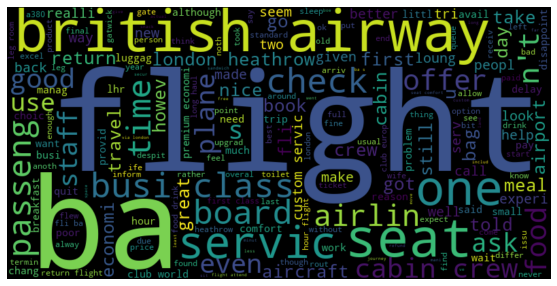

In [65]:
# Implementing Worldcloud to find the most repetitive words
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all cleaned reviews into a single text string
combined_text = ' '.join(df['cleaned_reviews'])

# Generate word cloud
def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Call the function with the combined text
generate_word_cloud(combined_text)


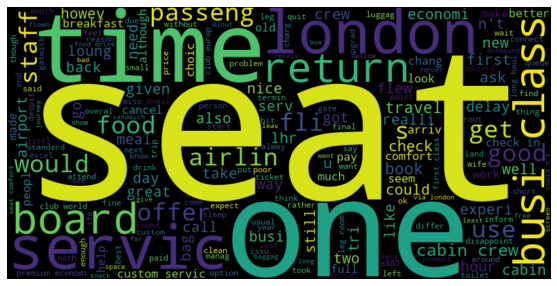

In [66]:
# Implementing a new WordCloud to find important repititive words

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all cleaned reviews into a single text string
combined_text = ' '.join(df['cleaned_reviews'])

# Generate word cloud and return the word cloud object
def generate_word_cloud(text, custom_stopwords=None):
    if custom_stopwords is None:
        custom_stopwords = set()
        
    stopwords = set(WordCloud().process_text(" ".join(custom_stopwords)))
    
    wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=stopwords).generate(text)
    return wordcloud

# Example of custom stopwords (replace this with your own list)
custom_stopwords = ["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"]

# Call the function with the combined text and custom stopwords
wordcloud = generate_word_cloud(combined_text, custom_stopwords)

# Display the word cloud with black background
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Sentiment Analysis for EDA

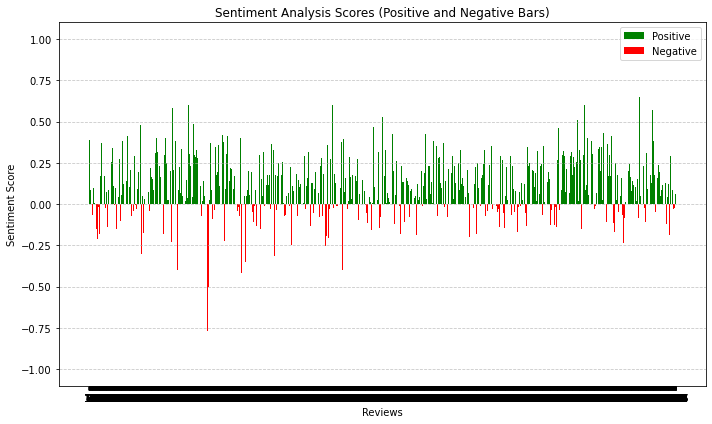

In [67]:
# Visualization of sentiment analysis Polarity of each review - Bar Graph

def plot_sentiment_scores_positive_negative(sentiment_scores):
    reviews = range(1, len(sentiment_scores) + 1)
    positive_scores = [score if score > 0 else 0 for score in sentiment_scores]
    negative_scores = [score if score < 0 else 0 for score in sentiment_scores]

    plt.figure(figsize=(10, 6))
    plt.bar(reviews, positive_scores, color='green', label='Positive', align='center')
    plt.bar(reviews, negative_scores, color='red', label='Negative', align='center')

    plt.xlabel('Reviews')
    plt.ylabel('Sentiment Score')
    plt.title('Sentiment Analysis Scores (Positive and Negative Bars)')
    plt.xticks(reviews)
    
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
plot_sentiment_scores_positive_negative(df['sentiment_score'])

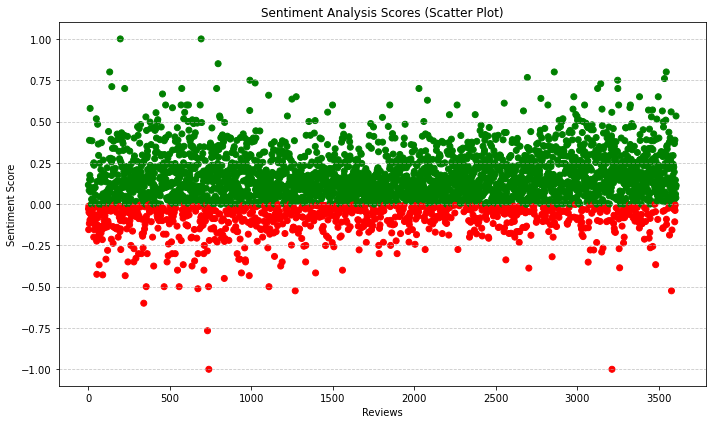

In [68]:
# Visualization of sentiment analysis Polarity of each review - Scatter Plot

import matplotlib.pyplot as plt

def plot_sentiment_scores_scatter(sentiment_scores):
    reviews = range(1, len(sentiment_scores) + 1)

    plt.figure(figsize=(10, 6))
    plt.scatter(reviews, sentiment_scores, color=['red' if score < 0 else 'green' for score in sentiment_scores])

    plt.xlabel('Reviews')
    plt.ylabel('Sentiment Score')
    plt.title('Sentiment Analysis Scores (Scatter Plot)')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
plot_sentiment_scores_scatter(df['sentiment_score'])

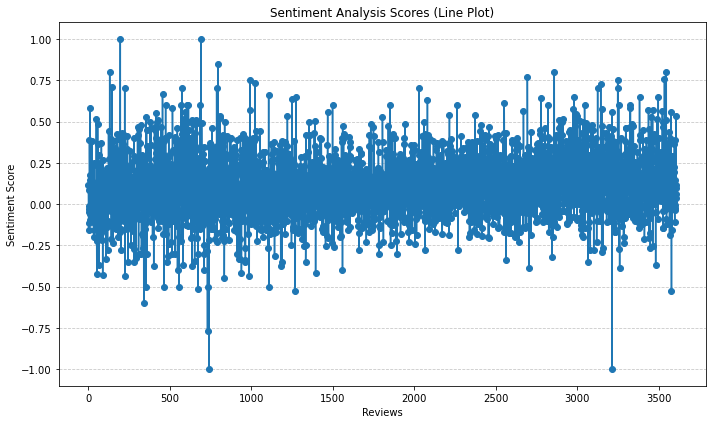

In [69]:
# Visualization of sentiment analysis Polarity of each review - Line Plot

import matplotlib.pyplot as plt

def plot_sentiment_scores_line(sentiment_scores):
    reviews = range(1, len(sentiment_scores) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(reviews, sentiment_scores, marker='o')

    plt.xlabel('Reviews')
    plt.ylabel('Sentiment Score')
    plt.title('Sentiment Analysis Scores (Line Plot)')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
plot_sentiment_scores_line(df['sentiment_score'])

## Reviews from the number of Countries 

In [70]:
#Determining the total number of countries
df['country'].nunique()

72

# Topic Modelling for EDA

In [71]:
# Implementation of topic modeliing using LDA

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming 'cleaned_reviews' column contains the preprocessed reviews

custom_stopwords = ["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"]

# Create a document-term matrix
vectorizer = CountVectorizer(max_features=1000, stop_words= custom_stopwords)
dtm = vectorizer.fit_transform(df['cleaned_reviews'])

# Apply LDA
num_topics = 10  # Choose the number of topics you want to extract
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_output = lda_model.fit_transform(dtm)

# Print the top words for each topic
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic {topic_idx+1}:")
    print([feature_names[i] for i in topic.argsort()[-10:]])
    print()

# Assign topics to each review
df['topic'] = lda_output.argmax(axis=1)


Topic 1:
['passeng', 'first', 'food', 'get', 'club', 'cabin', 'economi', 'busi', 'class', 'seat']

Topic 2:
['london', 'wait', 'staff', 'board', 'us', 'bag', 'arriv', 'check', 'delay', 'hour']

Topic 3:
['minut', 'arriv', 'gatwick', 'good', 'drink', 'servic', 'time', 'board', 'cabin', 'crew']

Topic 4:
['board', 'crew', 'servic', 'first', 'food', 'lhr', 'club', 'seat', 'loung', 'good']

Topic 5:
['experi', 'entertain', 'help', 'good', 'servic', 'staff', 'great', 'food', 'crew', 'london']

Topic 6:
['ask', 'chicken', 'choic', 'one', 'food', 'servic', 'offer', 'serv', 'drink', 'meal']

Topic 7:
['cabin', 'premium', 'london', 'comfort', 'entertain', 'leg', 'food', 'good', 'economi', 'seat']

Topic 8:
['get', 'experi', 'time', 'staff', 'food', 'fli', 'year', 'travel', 'servic', 'airlin']

Topic 9:
['price', 'charg', 'london', 'servic', 'fli', 'cost', 'pay', 'check', 'seat', 'airlin']

Topic 10:
['london', 'ticket', 'get', 'refund', 'day', 'servic', 'cancel', 'call', 'custom', 'book']



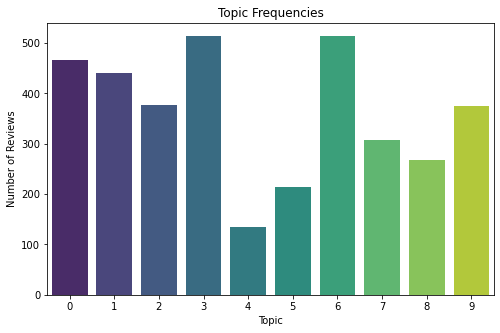

In [72]:
# Visulization of Topic modelling of 10 topics

import seaborn as sns
import matplotlib.pyplot as plt

# Bar Plot of Topic Frequencies
topic_counts = df['topic'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='viridis')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.title('Topic Frequencies')
plt.show()

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3607 entries, 0 to 3611
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   stars             3607 non-null   int64  
 1   country           3607 non-null   object 
 2   TripVerification  3607 non-null   int64  
 3   TripReviews       3607 non-null   object 
 4   year              3607 non-null   int64  
 5   month             3607 non-null   int64  
 6   day               3607 non-null   int64  
 7   cleaned_reviews   3607 non-null   object 
 8   sentiment_score   3607 non-null   float64
 9   topic             3607 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 310.0+ KB


In [74]:
df.head()

,stars,country,TripVerification,TripReviews,year,month,day,cleaned_reviews,sentiment_score,topic
0,5,Canada,1,Terrible Experience with British Airways. I b...,2023,7,29,terribl experi british airway book flight ba t...,0.116071,9
1,1,Qatar,1,An airline that lives in their past glory and...,2023,7,26,airlin live past glori head futur crisi britis...,-0.028409,7
2,1,United Kingdom,1,Check-in Desk rude and dismissive. Flight la...,2023,7,26,check-in desk rude dismiss flight late seem ne...,-0.154545,1
3,2,Spain,1,I chose British Airways especially because I ...,2023,7,25,chose british airway especi go travel niec nep...,-0.012244,1
4,1,United Kingdom,0,I booked Premium Economy from INV to LAX (via...,2023,7,24,book premium economi inv lax via lhr notifi ca...,-0.050000,9


# Counts for each rating for EDA

Text(0.5, 0.98, 'Counts for each ratings')

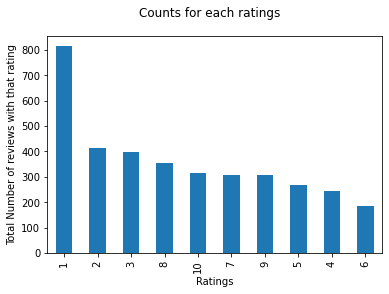

In [75]:
#Visualization of counts for each rating

df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

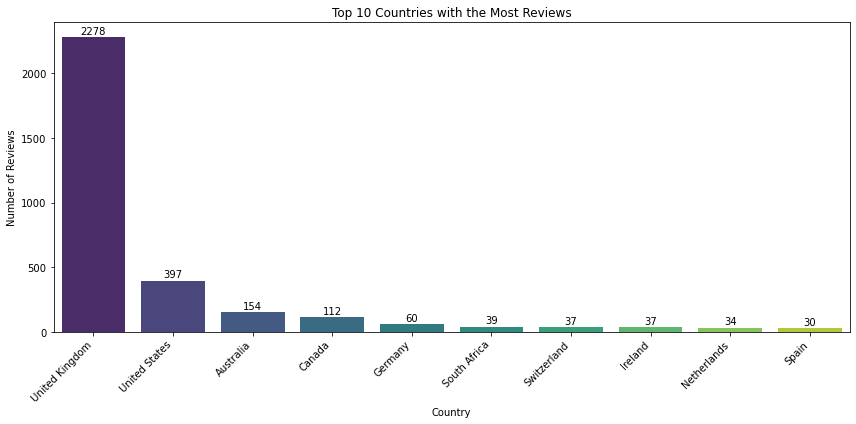

In [84]:
# Countries which gave the most reviews

country_counts = df['country'].value_counts().head(10)

# Create a bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Countries with the Most Reviews')
plt.xticks(rotation=45, ha='right')

# Display the exact number of reviews on top of each bar
for index, value in enumerate(country_counts.values):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [86]:
print(df.dtypes)

stars                 int64
country              object
TripVerification      int64
TripReviews          object
year                  int64
month                 int64
day                   int64
cleaned_reviews      object
sentiment_score     float64
topic                 int64
dtype: object


In [90]:
# Checking for any duplicate country

print(df['country'].unique())

['Canada' 'Qatar' 'United Kingdom' 'Spain' 'Germany' 'United States'
 'South Africa' 'Greece' 'Italy' 'Senegal' 'United Arab Emirates'
 'Romania' 'Australia' 'Cyprus' 'Chile' 'Sweden' 'Ireland' 'Hong Kong'
 'Netherlands' 'Austria' 'France' 'India' 'Belgium' 'New Zealand'
 'Czech Republic' 'Malaysia' 'Singapore' 'Ghana' 'Switzerland' 'Bermuda'
 'Botswana' 'Brazil' 'Panama' 'Nigeria' 'Russian Federation' 'Philippines'
 'Bulgaria' 'Poland' 'Thailand' 'Argentina' 'Mexico' 'Denmark'
 'Saint Kitts and Nevis' 'Vietnam' 'Norway' 'Jordan' 'Japan' 'Taiwan'
 'China' 'Slovakia' 'Kuwait' 'Israel' 'South Korea' 'Saudi Arabia'
 'Hungary' 'Portugal' 'Cayman Islands' 'Costa Rica' 'Egypt' 'Iceland'
 'Laos' 'Turkey' 'Indonesia' 'Bahrain' 'Dominican Republic' 'Luxembourg'
 'Finland' 'Ukraine' 'Trinidad & Tobago' 'St Lucia' 'Barbados' 'Oman']


In [91]:
# Checking for any null values in the country column

print(df['country'].isna().sum())

0


In [93]:
# Group by 'country' and calculate the mean of 'stars' for each country
average_ratings_by_country = df.groupby('country')['stars'].mean()

# Find the country with the highest average rating
highest_rated_country = average_ratings_by_country.idxmax()

# Find the highest average rating value
highest_average_rating = average_ratings_by_country.max()

print(f"The country average rating is: {average_ratings_by_country}")
print(f"The country with the highest average rating is: {highest_rated_country}")
print(f"The highest average rating is: {highest_average_rating}")


The country average rating is: country
Argentina               5.000000
Australia               4.766234
Austria                 5.818182
Bahrain                 1.000000
Barbados                5.000000
                          ...   
Ukraine                 8.000000
United Arab Emirates    3.260870
United Kingdom          4.748025
United States           4.715365
Vietnam                 1.000000
Name: stars, Length: 72, dtype: float64
The country with the highest average rating is: Chile
The highest average rating is: 10.0


In [ ]:
# Average Overall Rating 
average_rating = df["stars"].mean()

print("Average Overall Rating:", average_rating)

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

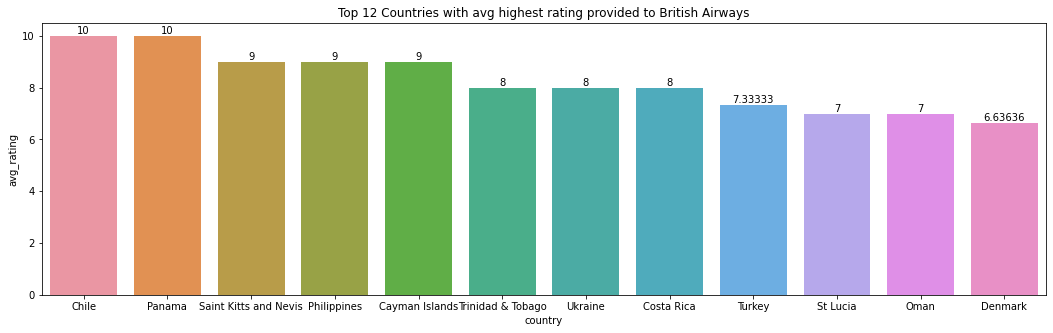

In [102]:
# Displaying Top 12 countries with respect to the ratings

df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

# Most Repitative words for EDA

In [114]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

reviews = " ".join(df.cleaned_reviews)
#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'servic'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, "n't"),
  Text(9, 0, 'hour'),
  Text(10, 0, 'airlin'),
  Text(11, 0, 'busi'),
  Text(12, 0, 'board'),
  Text(13, 0, 'staff'),
  Text(14, 0, 'fli'),
  Text(15, 0, 'economi'),
  Text(16, 0, 'passeng'),
  Text(17, 0, 'check'),
  Text(18, 0, 'return'),
  Text(19, 0, 'offer')])

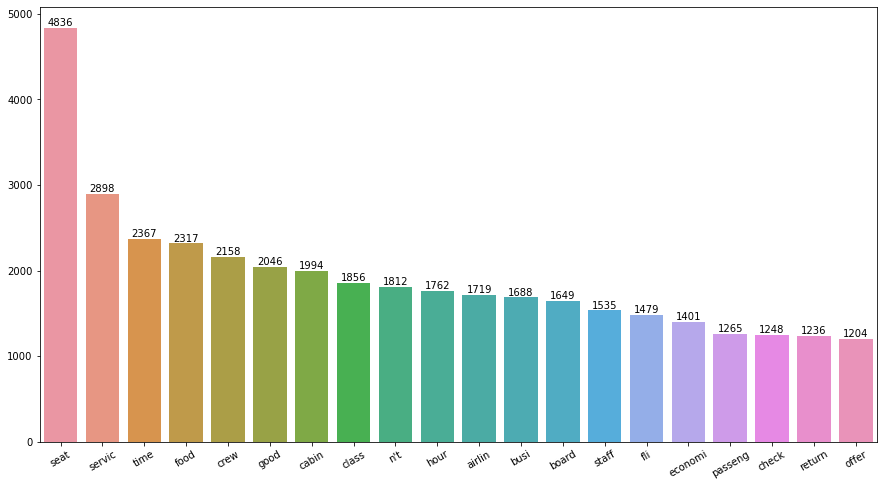

In [115]:
# 20 most common words and their counts

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

# Implementing N-th Gram for EDA

<AxesSubplot:>

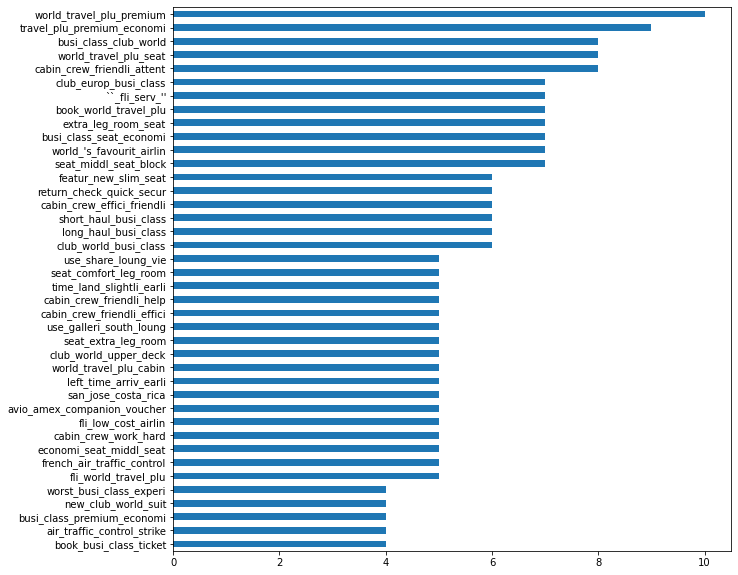

In [116]:
# Top 40 bigrams in the reviews

## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.cleaned_reviews)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

In [117]:
#Bigram with respect to the ratings

ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<AxesSubplot:>

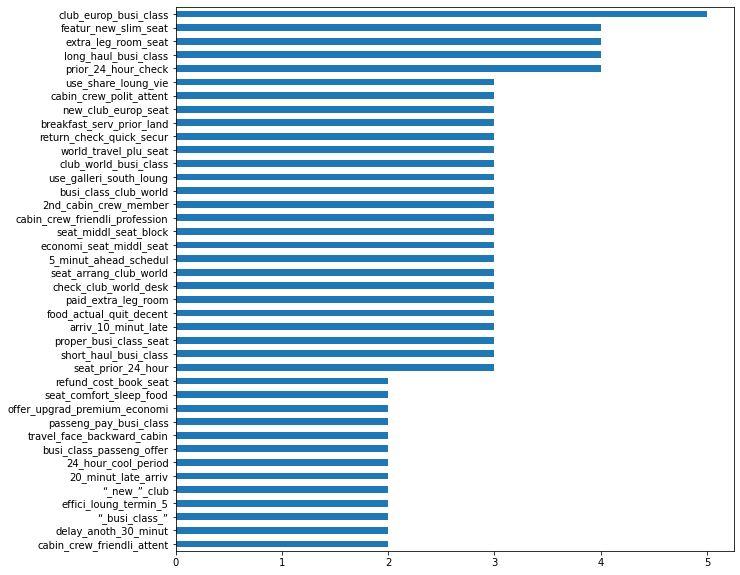

In [120]:
reviews_1_3 = " ".join(ratings_1_3.cleaned_reviews)
reviews_4_6 = " ".join(ratings_4_6.cleaned_reviews)
reviews_7_10 = " ".join(ratings_7_10.cleaned_reviews)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")

# Visualizing bigram for star rating from 7 - 10

new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<AxesSubplot:>

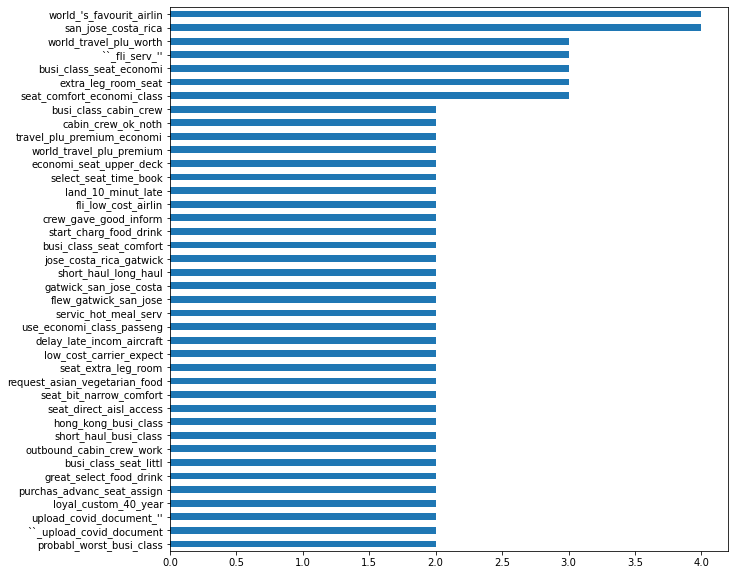

In [121]:
# Visualizing bigram for star rating from 4 - 6

new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<AxesSubplot:>

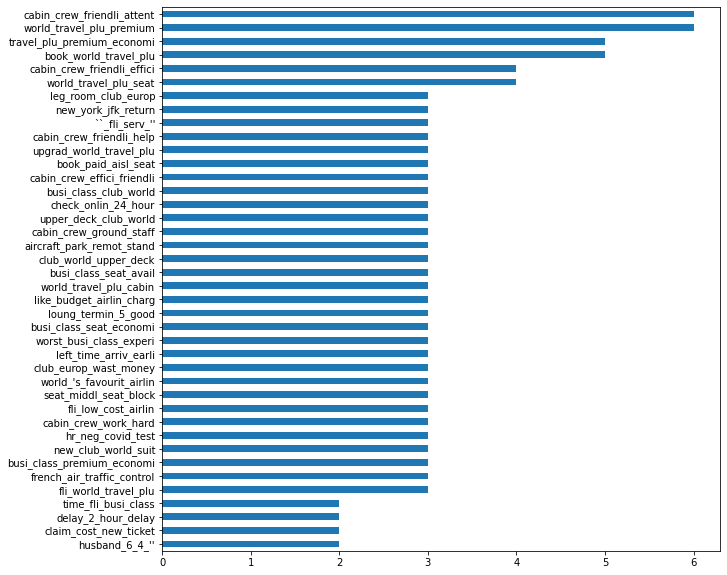

In [122]:
# Visualizing bigram for star rating from 1 - 3

new_words = [word for word in words_1_3 if word not in stopwords]

#get_freq_dist(new_words,4)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[index, col] = value


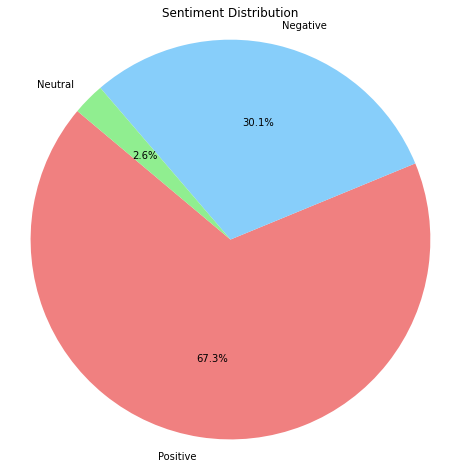

In [129]:
# Using Vader Algorithm for Sentiment polarity and visualization with pie-chart

import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Assuming 'cleaned_reviews' column contains the preprocessed reviews
# Create a new column to store the sentiment scores
df['sentiment_scores'] = 0.0

# Initialize the VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Drop rows with missing values in the 'cleaned_reviews' column
df = df.dropna(subset=['cleaned_reviews'])

# Calculate sentiment scores for each review
for i, review in enumerate(df['cleaned_reviews']):
    sentiment_score = analyzer.polarity_scores(review)['compound']
    df.at[i, 'sentiment_scores'] = sentiment_score

# Function to categorize sentiment
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Categorize sentiments for each review
df['sentiment_category'] = df['sentiment_scores'].apply(categorize_sentiment)

# Count the number of reviews in each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'], startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()


In [130]:
dropped_rows = df['cleaned_reviews'].isnull().sum()

In [131]:
print(f"Number of dropped rows with missing 'cleaned_reviews': {dropped_rows}")

Number of dropped rows with missing 'cleaned_reviews': 5
